In [142]:
import requests
import bs4
import urllib.request
import selenium.webdriver
import time
import pySmartDL

In [143]:
first_ep = input("Enter the link for first episode: ")
print("Getting information about series...")

Enter the link for first episode: http://9anime.to/watch/akagami-no-shirayuki-hime.09k/ooq1z
Getting information about series...


In [158]:
browoser = selenium.webdriver.Firefox()

In [145]:
browoser.get(first_ep)
time.sleep(5)
ps = browoser.page_source

In [146]:
soup = bs4.BeautifulSoup(ps, 'lxml')

In [147]:
a = soup.select('#jw > div.jw-media.jw-reset > video')

In [148]:
b = soup.select('a')

In [149]:
links = []
i = 1
for link in b:
    try:
        if 'watch' in link['href'] and '9anime' not in link['href'] :
            links.append(link['href'])
    except KeyError:
        pass
# for link in links:
#     if '9anime' in link:
#             i = i+1

In [150]:
total_ep = (len(links))/3

In [151]:
total_ep 

12.333333333333334

In [152]:
links = links[0:int(total_ep)+1]
series_name = links[0].split('/')[2].replace(".",'-')
print("\tSeries Name: "+series_name)
print("\tTotal episodes: "+str(int(total_ep)))
is_correct = input("Press y if correct else press n")
ep_start = input("Enter the start episode number: ")
ep_end = input("Enter the end episode number: ")

	Series Name: akagami-no-shirayuki-hime-09k
	Total episodes: 12
Press y if correct else press ny
Enter the start episode number: 1
Enter the end episode number: 12


In [159]:
if is_correct=='y' or is_correct=='Y':
    ep = int(ep_start)
    for link in links[int(ep_start)-1:int(ep_end)]:
        a = []
        print("Downloading ep- "+str(ep))
        ep_url = "http://9anime.to"+link
        print(ep_url)
        browoser.get(ep_url)
        while len(a)==0:
            time.sleep(5)
            ps = browoser.page_source
            soup = bs4.BeautifulSoup(ps, 'lxml')
            a = soup.select('#jw > div.jw-media.jw-reset > video')
        print(a)
        browoser.get(a[0]['src'])
        time.sleep(3)
        dwnld_url = browoser.current_url
        obj = pySmartDL.SmartDL(dwnld_url, dest='/home/akshay/My Projects/'+series_name+"-ep-"+str(ep)+'.mp4', progress_bar=False)
        obj.start()
        print("ep- "+str(ep)+" downloaded successfully")
        ep = ep + 1
else:
    print("Some error occured....contact admin")

http://9anime.to/watch/akagami-no-shirayuki-hime.09k/ooq1z
[<video class="jw-video jw-reset" src="https://r14---sn-axq7sn7e.googlevideo.com/videoplayback?requiressl=yes&amp;id=338e80d4bb96c127&amp;itag=22&amp;source=webdrive&amp;ttl=transient&amp;app=explorer&amp;ip=2a00:1838:35:80::463c&amp;ipbits=0&amp;expire=1474200463&amp;sparams=requiressl%2Cid%2Citag%2Csource%2Cttl%2Cip%2Cipbits%2Cexpire&amp;signature=413645742CDFBDF53A1165BFD52113F5C671F0EC.A068C2DD8AEBE67F087CC23763B2344A1986A58C&amp;key=ck2&amp;mm=31&amp;mn=sn-axq7sn7e&amp;ms=au&amp;mt=1474185575&amp;mv=m&amp;pl=43" style="transform: scale(0.734375, 0.736111); left: -170px; right: -170px; width: 1280px; height: 720px; bottom: -95px; top: -95px;" webkit-playsinline="" x-webkit-airplay="allow"></video>]


KeyboardInterrupt: 

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en"><head><script src="https://apis.google.com/_/scs/apps-static/_/js/k=oz.gapi.en_GB.mAT4oU1i5UQ.O/m=auth/exm=plusone/rt=j/sv=1/d=1/ed=1/am=AQ/rs=AGLTcCOT4t4rAEoQuFBZ_Karsj-ls2h0Ww/cb=gapi.loaded_1" async=""></script><script src="https://apis.google.com/_/scs/apps-static/_/js/k=oz.gapi.en_GB.mAT4oU1i5UQ.O/m=plusone/rt=j/sv=1/d=1/ed=1/am=AQ/rs=AGLTcCOT4t4rAEoQuFBZ_Karsj-ls2h0Ww/cb=gapi.loaded_0" async=""></script><script type="text/javascript" src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2F9anime.to%2Fwatch%2Fakagami-no-shirayuki-hime.09k&amp;callback=_ate.cbs.sc_http9animetowatchakagaminoshirayukihime09k0"></script><script type="text/javascript" src="//apis.google.com/js/plusone.js" gapi_processed="true"></script><script type="text/javascript" src="//platform.twitter.com/widgets.js"></script><script type="text/javascript" src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2F9anime.to%2Fwatch%2
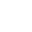
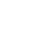
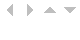
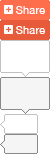
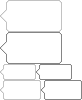

In [155]:
ps
